# 3
## Exploring movie release days and months

### Importing necessary libraries

In [1]:
from importlib import reload

import sqlite3
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
conn = sqlite3.connect("movies_db.sqlite")
cur = conn.cursor()

In [3]:
for row in cur.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('imdb_title_crew',)
('imdb_title_ratings',)
('imdb_title_principals',)
('rt_movie_info',)
('rt_reviews',)
('tmdb_movies',)
('tn_movie_budgets',)
('imdb_name_basics',)
('imdb_title_akas',)
('bom_movie_gross',)
('imdb_title_basics',)


In [5]:
cur.execute('''SELECT *
               FROM tn_movie_budgets
               JOIN tmdb_movies
               ON tn_movie_budgets.movie = tmdb_movies.original_title
             ''')
df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in cur.description]
df.head()

index  id         release_date  \
0      0   1  2010-11-19 00:00:00   
1      1   2  2010-03-26 00:00:00   
2      3   4  1995-11-22 00:00:00   
3      6   7  2009-12-18 00:00:00   
4      8   9  2010-07-09 00:00:00   

                                         movie  production_budget  \
0                                       Avatar          425000000   
1  Pirates of the Caribbean: On Stranger Tides          410600000   
2                      Avengers: Age of Ultron          330600000   
3                       Avengers: Infinity War          300000000   
4                               Justice League          300000000   

   domestic_gross  worldwide_gross  domestic_net  worldwide_net release_day  \
0       760507625       2776345279     335507625     2351345279         4.0   
1       241063875       1045663875    -169536125      635063875         4.0   
2       459005868       1403013963     128405868     1072413963         2.0   
3       678815482       2048134200     378815482     1748134200         4.0   
4       229024295        655945209     -70975705      355945209         4.0   

   ...      id  original_language  \
0  ...   19995                 en   
1  ...    1865                 en   
2  ...   99861                 en   
3  ...  299536                 en   
4  ...  141052                 en   

                                original_title popularity  \
0                                       Avatar     26.526   
1  Pirates of the Caribbean: On Stranger Tides     30.579   
2                      Avengers: Age of Ultron     44.383   
3                       Avengers: Infinity War     80.773   
4                               Justice League     34.953   

          release_date                                        title  \
0  2009-12-18 00:00:00                                       Avatar   
1  2011-05-20 00:00:00  Pirates of the Caribbean: On Stranger Tides   
2  2015-05-01 00:00:00                      Avengers: Age of Ultron   
3  2018-04-27 00:00:00                       Avengers: Infinity War   
4  2017-11-17 00:00:00                               Justice League   

  vote_average  vote_count release_day release_month  
0          7.4       18676           4            12  
1          6.4        8571           4             5  
2          7.3       13457           4             5  
3          8.3       13948           4             4  
4          6.2        7510           4            11  

[5 rows x 24 columns]

In [7]:
df.columns

Index(['index', 'id', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'domestic_net', 'worldwide_net',
       'release_day', 'release_month', 'level_0', 'index', 'genre_ids', 'id',
       'original_language', 'original_title', 'popularity', 'release_date',
       'title', 'vote_average', 'vote_count', 'release_day', 'release_month'],
      dtype='object')

In [8]:
df.columns = ['index', 'id', 'release_date_1', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'domestic_net', 'worldwide_net',
       'release_day_1', 'release_month_1', 'level_0', 'index', 'genre_ids', 'id',
       'original_language', 'original_title', 'popularity', 'release_date_2',
       'title', 'vote_average', 'vote_count', 'release_day_2', 'release_month_2']

## Release Day v. Popularity

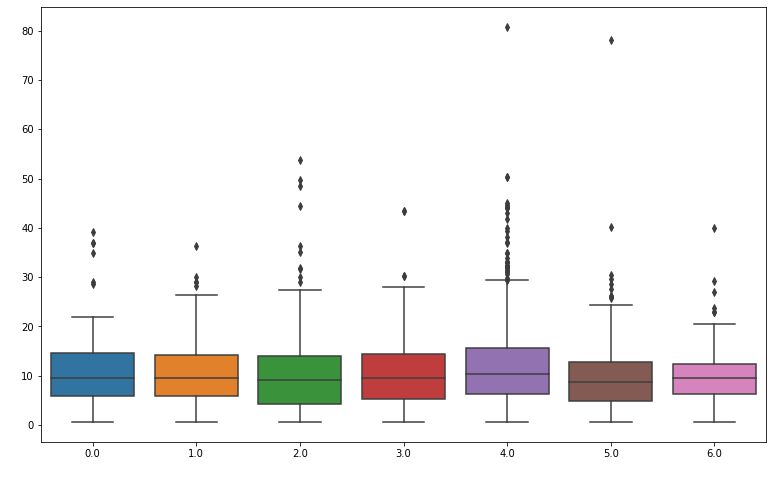

In [42]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'white', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(13, 8))
sns.boxplot(x='release_day_1', y='popularity', data=df)
plt.show()

## Release Day v. Worldwide Gross

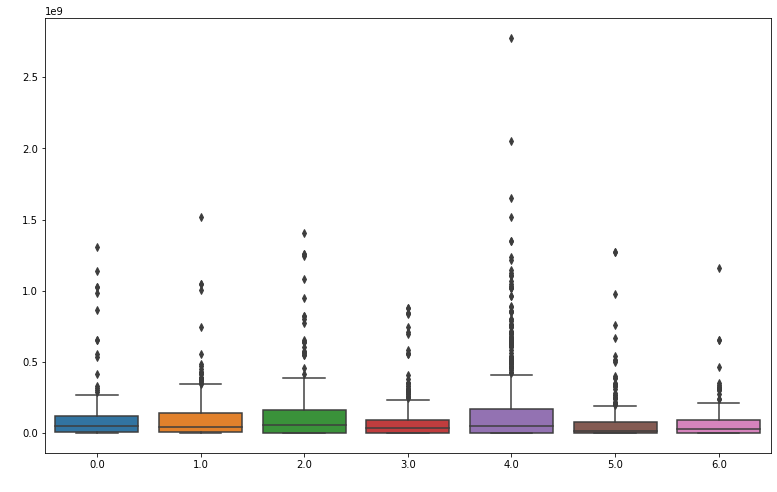

In [43]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'white', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(13, 8))
sns.boxplot(x='release_day_1', y='worldwide_gross', data=df)
plt.show()

## Release Month v. Popularity

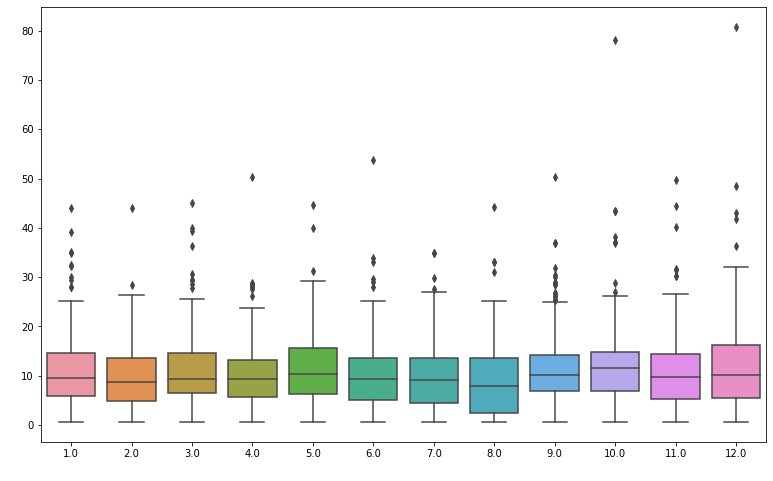

In [44]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'white', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(13, 8))
sns.boxplot(x='release_month_1', y='popularity', data=df)
plt.show()

## Release Month v. Worldwide Gross

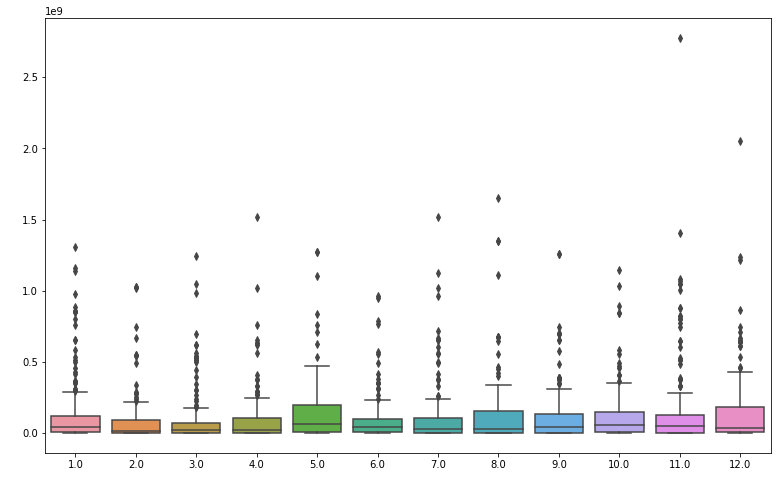

In [45]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'white', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(13, 8))
sns.boxplot(x='release_month_1', y='worldwide_gross', data=df)
plt.show()

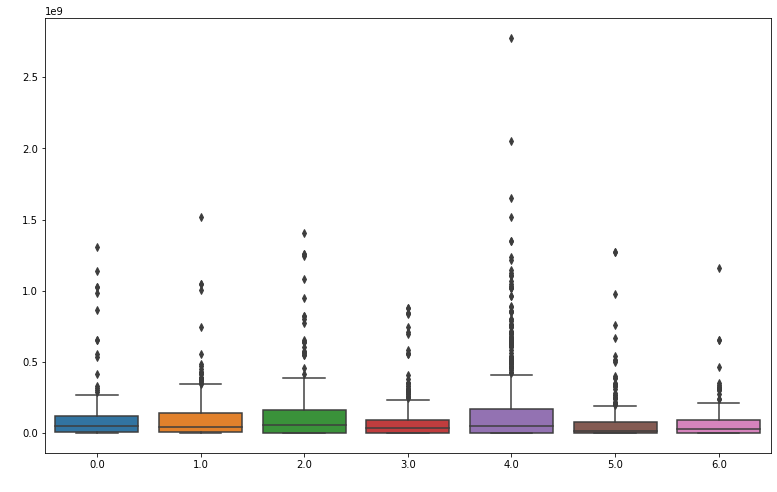

In [46]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='release_day_1', y='worldwide_gross', data=df)
plt.show()

In [41]:
df['worldwide_gross'].mean()

123288459.15951742

In [40]:
df['worldwide_gross'].std()

224408031.7339068

In [39]:
df.groupby('release_day_1').mean()

index         id  production_budget  domestic_gross  \
release_day_1                                                              
0.0            2563.612903  51.709677       3.560860e+07    5.561320e+07   
1.0            2746.140845  50.521127       3.350973e+07    4.562746e+07   
2.0            2699.434783  50.745342       4.548649e+07    6.770584e+07   
3.0            2716.989305  51.679144       4.317981e+07    4.289784e+07   
4.0            2608.955039  50.420155       4.664672e+07    6.601089e+07   
5.0            3193.743860  48.428070       2.594940e+07    3.403210e+07   
6.0            2841.035211  52.598592       3.088022e+07    3.736225e+07   

               worldwide_gross  domestic_net  worldwide_net  release_month_1  \
release_day_1                                                                  
0.0               1.297421e+08  2.000460e+07   9.413350e+07         6.370968   
1.0               1.023071e+08  1.211773e+07   6.879741e+07         7.323944   
2.0               1.615144e+08  2.221935e+07   1.160279e+08         7.204969   
3.0               1.115017e+08 -2.819688e+05   6.832193e+07         6.593583   
4.0               1.643294e+08  1.936416e+07   1.176827e+08         5.731783   
5.0               7.733519e+07  8.082700e+06   5.138580e+07         5.140351   
6.0               8.198843e+07  6.482037e+06   5.110821e+07         6.802817   

                    level_0         index             id  popularity  \
release_day_1                                                          
0.0            10449.685484  10449.685484  193112.000000   10.650331   
1.0            11737.912676  11737.912676  223014.825352   10.225532   
2.0            11267.229814  11267.229814  207870.776398   11.101578   
3.0            12371.866310  12371.866310  220622.882353   10.343299   
4.0            11258.962791  11258.962791  201615.286822   12.003828   
5.0            11091.929825  11091.929825  216911.649123    9.675207   
6.0            10202.718310  10202.718310  192441.669014    9.742423   

               vote_average   vote_count  release_day_2  release_month_2  
release_day_1                                                             
0.0                6.156452  1776.298387       3.637097         6.629032  
1.0                6.187606  1509.642254       3.667606         6.819718  
2.0                6.330435  1975.950311       3.627329         6.850932  
3.0                6.098930  1677.245989       3.427807         6.978610  
4.0                6.247287  2237.581395       3.660465         6.888372  
5.0                6.127018  1123.761404       3.589474         7.045614  
6.0                6.142254  1382.330986       3.563380         6.732394

# Conclusion
Friday is the best day to release a movie by far, in terms of both popularity and also worldwide gross.

December is the best month to release a movie, also in terms of both popularity and worldwide gross.